# The numpy.random Package

[Official Documentation](https://numpy.org/doc/stable/reference/random/index.html)
***

<br>

## What is Numpy?

Numpy (Numerical Python) is one of the most useful libraries in python for data analysis. It is great because it can crunch numbers extremely fast. This is because the ndarray object encapsulates n-dimensional arrays of homogeneous data types, with many operations being performed in compiled code for performance. Users of NumPy can manage data in vectors, matrices and N-Dimensional Arrays (ndarray).[01] NumPy supports most Python libraries that do scientific or numerical computation. In fact it is the foundation of these libraries. This includes SciPy, Matplotlib, pandas, scikit-learn and scikit-image.[01]

## Packages to import for the notebook:

In [1]:
%matplotlib inline
import matplotlib.mlab as mlab
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
#import scipy
from scipy.stats import norm
from scipy import stats

In [2]:
#1
a = np.random.random(3)
a

array([0.17024255, 0.35051498, 0.42605512])

3 numbers as output. 3 means 3 numbers. What if we want to print out not just one row but 3 rows?

In [3]:
b = np.random.random((3, 3))
b

array([[0.68727599, 0.00522594, 0.26658069],
       [0.18900163, 0.2702018 , 0.22445865],
       [0.99409831, 0.18225114, 0.97597961]])

<br>

## numpy.random

Random is a module which generates pseudo-random numbers, Other module functions depend on the function random() to generate random numbers from different distributions depending on the function called within the random module. The Random module contains very useful functions.

The Random module contains many functions for generating random numbers. Numpy's random module provides methods for obtaining random numbers from any of several distributions as well as covenient ways to choose random entries from an array and to randomly shuffle the contents of an array. The random module uses an algorithm called PCG64 pseudorandom generator (PRNG). The PCG64 algorithm has been recently updated from the Mersenne Twister algorithm.

Random package is a sub package of the numpy package in Python. The numbers are not completely random from literature findings covered for this assignment. Random numbers are drawn from probability distribution.

Numpy’s random number routines produce pseudo random numbers using combinations of a BitGenerator to create sequences and a Generator to use those sequences to sample from different statistical distributions.[02]
- BitGenerators are objects that generate random numbers. These are typically unsigned integer words filled with sequences of either 32 or 64 random bits. [02]
- Generators are objects that transform sequences of random bits from a BitGenerator into sequences of numbers that follow a specific probability distribution (such as uniform, Normal or Binomial) within a specified interval.[02]

## Recent Upgrade to PCG-64 Algorithm

In the versions before Numpy v1.19, the numpy.random module was using the Mersenne Twister (MT19937) algorithm to generate pseudorandom numbers. Now, the Permutation Congruential generator (PCG-64) algorithm is used. Developed in 2014, the PCG-64 is a 128-bit implementation of O’Neill’s permutation congruential generator. The main reasons for the upgrade to this new algorithm are:

1. When put to the test in the scientific paper "TestU01: A C Library for Empirical Testing of Random Number Generators", the researchers came to the conclusion that MT19937 performed poorly on statistical tests. It was discovered that there is a high level of predictability to the pseudorandom number sequences generated by this algorithm. The seed number could be figured out quite easily making it insecure.
2. MT19937 is relatively slow when compared to the best algorithms of today in the paper "PCG: AFamily of Simple Fast Space-Efficient Statistically GoodAlgorithms for Random NumberGeneration". This paper highlights that the MT19937 algorithm's speed measured in Gb/s (Giga bytes per second). The test used in this paper is the "TestU01" test. This test works by performing some statistically well understood task using a candidate generator and then checking the plausibility of the results. It should be noted also that all members of the PCG-64 algorithm are faster than other generators in their class. This paper also shows that the MT19937 algorithm is insecure just like the paper mentioned above. This is because the TestU01's “linear complexity” test was able to spot nonrandom behaviour within 5 seconds. In contrast, some of the more robust candidates (algorithms) for the test in the TestU01 library can take hours to days to run. This clearly shows that MT19937 fell down at one of the earliest challenges put to it by TestU01[12].
To use the new algorithm PCG-64, instead of using numpy.random.seed, we should now use np.random.default_rng(). It is commonplace to use rng is the object as seen below.

In [4]:
rng = np.random.default_rng(12345)
print(rng)

Generator(PCG64)


The output here shows that the object rng has created an instance of Generator. Below we use this instance of Generator to create a random float of class float.The Generator is the user-facing object that is nearly identical to the legacy RandomState. It accepts a bit generator instance as an argument.

In [5]:
rfloat = rng.random()
rfloat

0.22733602246716966

In [6]:
type(rfloat)

float

If we needed to use the old MT19937 generator for whatever reason, we can do so by passing it as an argument to the Generator function. This is not recommended though but may be done. The following code is needed:

In [7]:
from numpy.random import Generator, MT19937
rg = Generator(MT19937(12345))
rg.random()

0.37786929937474845

## Seeds in Generating Pseudorandom Numbers

To understand the meaning of what it is to seed a random number generator, firstly we need to know a little bit about pseudo-random numbers. The definition of a pseudorandom number according to Wolfram Mathworld is 'a computer-generated random number'. The definition goes onto explain that 'The prefix pseudo- is used to distinguish this type of number from a “truly” random number generated by a random physical process such as radioactive decay'. A computer by design is inherintly deterministic, meaning that if you give a computer an input, it will precisely follow instructions to produce an output. Also, if a computer is given that imput again it will produce the exact same output. This means that computers do not behave randomly.

Algorithms have been developed to create psuedo random numbers called 'peudo-random number generators'(PRNGs). Since a computer executes these algorithms they are still completely deterministic, but these PRMGs approximate the properties of random numbers. They appear to be random.

Below are some pseudo-random numbers with the NumPy randint function:

In [8]:
rng = np.random.default_rng(1)
rints = rng.integers(low = 1, high = 10, size = 50)
rints

array([5, 5, 7, 9, 1, 2, 8, 9, 3, 3, 8, 4, 3, 8, 3, 4, 6, 5, 1, 1, 8, 7,
       8, 5, 8, 3, 5, 8, 2, 3, 2, 5, 9, 2, 4, 4, 9, 2, 5, 3, 1, 7, 1, 3,
       5, 5, 2, 9, 7, 9], dtype=int64)

In [9]:
#Legacy code
np.random.seed(1)
np.random.randint(low = 1, high = 10, size = 50)

array([6, 9, 6, 1, 1, 2, 8, 7, 3, 5, 6, 3, 5, 3, 5, 8, 8, 2, 8, 1, 7, 8,
       7, 2, 1, 2, 9, 9, 4, 9, 8, 4, 7, 6, 2, 4, 5, 9, 2, 5, 1, 4, 3, 1,
       5, 3, 8, 8, 9, 7])

Although these numbers look random, they are actually determined by the algorithm. Further, if we were to run this code again, we would get the exact same numbers. This is because, as said earlier, when we give a computer an input, it will precisely follow instructions to produce an output. This means that pseudo-random number generators are deterministic and repeatable. Pseudo-random number generators can create and then re-create the exact same set of pseudo-random numbers. We'll now use the exact same code as above using NumPy's randint function again and with the exact same seed as before.

In [10]:
rng = np.random.default_rng(1)
rints = rng.integers(low = 1, high = 10, size = 50)
rints

array([5, 5, 7, 9, 1, 2, 8, 9, 3, 3, 8, 4, 3, 8, 3, 4, 6, 5, 1, 1, 8, 7,
       8, 5, 8, 3, 5, 8, 2, 3, 2, 5, 9, 2, 4, 4, 9, 2, 5, 3, 1, 7, 1, 3,
       5, 5, 2, 9, 7, 9], dtype=int64)

In [11]:
#Legacy code
np.random.seed(1)
np.random.randint(low = 1, high = 10, size = 50)

array([6, 9, 6, 1, 1, 2, 8, 7, 3, 5, 6, 3, 5, 3, 5, 8, 8, 2, 8, 1, 7, 8,
       7, 2, 1, 2, 9, 9, 4, 9, 8, 4, 7, 6, 2, 4, 5, 9, 2, 5, 1, 4, 3, 1,
       5, 3, 8, 8, 9, 7])

The way this works is that numpy.random.seed provides the input to the algorithm. The algorithm then generates pseudo-random numbers in NumPy. This input is called the 'Seed' value. The numpy.random.seed function is useless on it's own. It works in conjunction with other functions from the numpy.random package. In the examples above, we used numpy.random.seed along with numpy.random.randint which enabled us to create random integers. We could also use numpy.random.seed with numpy.random.normal to create normally distributed numbers. There are many other random functions in the package that enable us to generate random numbers, random samples, and samples from specific probability distributions.
Looking at the above examples again, it is clear that we gave the pseudo-random number generator the same input twice and gog the same, you’ll get the same output.<br>
The syntax of NumPy random seed is as seen below:

![THE SYNTAX OF NUMPY RANDOM SEED](https://cdn-coiao.nitrocdn.com/CYHudqJZsSxQpAPzLkHFOkuzFKDpEHGF/assets/static/optimized/rev-46bfc56/wp-content/uploads/2019/05/numpy-random-seed_syntax.png)

To use it, just call the function by name and then pass in a “seed” value inside the parenthesis. Let's use the NumPy random random function (np.random.random) to generate a random number between zero and one. This time we'll put the seed value as 0.

In [12]:
rng = np.random.default_rng(0)
rfloat = rng.random()
rfloat

0.6369616873214543

In [13]:
#Legacy code
np.random.seed(0)
np.random.random()

0.5488135039273248

let’s run it again with the same seed.

In [14]:
rng = np.random.default_rng(0)
rfloat = rng.random()
rfloat

0.6369616873214543

In [15]:
#Legacy code
np.random.seed(0)
np.random.random()

0.5488135039273248

Just like in the first example, the generated number is exactly the same as the first time we ran the code. A question we might ask ourselves at this point is what number should we pass through the parenthesis? It doesn't really matter, but the output of a numpy.random function will depend on the seed that you use. Let's get np.random.randint to generate an array of 5 integers between 0 and 99.

In [16]:
rng = np.random.default_rng(0)
rints = rng.integers(99, size = 5)
rints

array([84, 63, 50, 26, 30], dtype=int64)

In [17]:
#Legacy code
np.random.seed(0)
np.random.randint(99, size = 5)

array([44, 47, 64, 67, 67])

Now let's run the exact same code again but with a different seed.

In [18]:
rng = np.random.default_rng(1)
rints = rng.integers(99, size = 5)
rints

array([46, 50, 74, 94,  3], dtype=int64)

In [19]:
#Legacy code
np.random.seed(1)
np.random.randint(99, size = 5)

array([37, 12, 72,  9, 75])

The output of a numpy.random function depends on the value of np.random.seed, however the choice of seed value is arbitrary. If we were to use a function from the numpy.random package (np.random.normal for exacmple) without using NumPy random seed first, Python would actually still use numpy.random.seed in the background. NumPy would generate a seed value from a part of our computer system (like /urandom on a Unix or Linux machine). In other words, if you don’t set a seed with numpy.random.seed, NumPy will set one for you. However, If we were to not set a seed value, our code would not have repeatable outputs. NumPy would generate a seed on its own, but that seed would vary and we wouldn't know it's value. This would make our outputs different every time we run it. So it is actually a good thing that this process is repeatable if we seed our values using numpy.random.seed. This is because code that has well defined, repeatable outputs is good for testing and sharing. The take home message here is that we should always use numpy.random.seed to get repeatable outputs.

In [20]:
np.random.Generator 

numpy.random._generator.Generator

In [21]:
# Do this (new version)
from numpy.random import default_rng
rng = default_rng()
vals = rng.standard_normal(10)
more_vals = rng.standard_normal(10)

When we observe the physical world we find random fluctuations everywhere. We can generate truly random numbers by measuring random fluctuations known as noise. When we measure this noise, known as 'sampling', we can obtain numbers. For example, if we were to measure the electric current of TV static over time, we would generate a truly random sequence. We can visualise this random sequence by drawing a path that changes direction according to each number. This is known as a random walk. Notice the lack of pattern at all scales. At each point in the sequence, the next move is always unpredictable. Random processes are 'nondeterministic' since they are impossible to determine in advance. Computers on the other hand are 'deterministic'. Their operation is predicatbele and repeatable. In 1946, John Von Neuman was involved in running computations for the military where he was involved in the design of the Hydrogen Bomb. Using a computer called the Eniac, he planned to repeatedly calculate approximations of the processes invloved in nuclear fission. This required quick access to randomly generated numbers that could be repeated if needed. The Eniac had very little internal memory. Storing long random sequences was not possible. To overcome this, Neuman developed and algorithm to mecahnically simulate the scrambling aspect of randomness as follows. First, select a seed value as discussed above. This seed is provided as imput to a simple calculation. Multiply the seed by itself and then output the middle of this result. This output is then used as the next seed and the process is repeated as many times as needed. This is knows as the 'middle squares method' and is just the first in a long line of pseudo-random number generators. The randomness of the sequence is dependent on the randomness of the inital seed only. Same seed, same sequence. So what are the differnces between a randomly generated vs pseudo-randomly generated sequences? If we were to represend each sequence as a random walk, they seem similar until speeded up. A pseudo-random sequence must eventually repeat. This occurs when the algorithm reaches a seed it has previously used and the cycle repeats. The length before a pseudo-random sequence repeats is called the period. The period is strictly limited by the length of the initial seed. For example, if we use a 2-digit seed, then an algorithm can produce at most 100 numbers before reusing a seed and repeating the cycle. A 3-digit seed can expand passed 1000 numbers before repeating its cycle. A 4-digit seed can expand 10,000 numbers before repeating. If we use a seed large enough, the sequence can expand into trillions of digits before repeating. The key difference is important. When we generate numbers pseudo-randomly, there are many sequences which cannot occur. When we move from random to pseudo-random shifts, we shrink the key space into a much much smaller seed space. So for a pseudo-random sequence to be indistinguishable from a randomly generated sequence, it must be impractical for a computer to try all seeds and look for a match. This leads to an important distiction in computer science between what is possible vs what is possible in a reasonable amount of time. We use the same logic when we buy a bike lock. We know that anybody can simply try all possible combinations until they find a match and it opens. But it would take them days to do so. So for 8 hours, we assume it's practically safe. With pseudo-random generators, the security inceases as the length of the seed increases. If the most powerful computer would take hundreds of years to run through all seeds, then we can safely assume that it's practically secure instead of perfectly secure. As computers get faster, the seed size must increase accordingly.

## Simple Random Data

The Simple Random Data functions in the NumPy package are integers (numpy.random.Generator.integers), random (numpy.random.Generator.random), choice (numpy.random.Generator.choice) and bytes (numpy.random.Generator.bytes). 

### Integers

The integer function return random integers. To start, let's create an rng with a seed value of 42. 

In [22]:
rng = np.random.default_rng(42)

We can call the function by writing ``rng.integers()``. Something must be passed as an argument through the parenthesis though otherwise we will get an error.

The default parameters are rng.integers(low, high=None, size=None, dtype=np.int64, endpoint=False) Let's take a look at the parameters:

Let's start by simply passing one number as an argument, 5.

In [23]:
rng.integers(5)

0

This gives a random integer in the range from 0 to 4. This is because the 'high' value is exclusive, meaning that the range will stop at one integer value before the 'high' value, 5 in this case. The 'low' value is 0 by default. In the function below, we have asked the integers function to give us one random integer in the range from 1 to 9. 

In [24]:
rng.integers(1, 10)

7

Let's confirm that the 'high' number is exclusive by asking the integer function to give us 10 random integers in the range of 0 to 1 by setting the high value to 2 and using the 'size' parameter. The 'size' parameter is the output shape, meaning that if we pass ``size = 10`` through the function, we will get 10 intgers out.

In [25]:
rng.integers(2, size = 10)

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [26]:
rng.integers(2, size = 10, endpoint = True)

array([2, 2, 2, 2, 1, 0, 2, 1, 1, 1], dtype=int64)

We can see here that changing 'endpoint' to true gave us some 2's, showing us that changing 'endpoint' to true forces the function to include the 'high' value.<br>
Now let's pass a tuple for the 'size' paramater and see what happens.

In [27]:
rints_1 = rng.integers(5, size = (2, 4))
rints_1

array([[0, 4, 3, 3],
       [2, 4, 2, 2]], dtype=int64)

In [28]:
rints.ndim

1

The output here is a NumPy array. This is a 2 x 4 2 dimensional array of integers between 0 and 4. Let's now try a bigger shape.

In [29]:
rints_2 = rng.integers(5, size = (2, 4, 2))
rints_2

array([[[2, 1],
        [0, 2],
        [4, 0],
        [4, 4]],

       [[1, 3],
        [0, 3],
        [3, 1],
        [0, 4]]], dtype=int64)

The output here is a 2 x 4 x 2 3 dimensional array of integers between 0 and 4.

In [30]:
rints_2.ndim

3

We can also pass an array of integers as the 'high' value which will give us a set of upper bounds. For example, let's generate a 1 x 2 array with 2 different upper bounds.

In [31]:
rng.integers(1, [3, 5])

array([1, 4], dtype=int64)

Above, the 1 is the lower limit. The first integer generated must be between 1 and 2 and second integer must be between 1 and 4

Now let's generate a 1 x 3 array with 3 different upper bounds. 

In [32]:
rng.integers(1, [3, 5, 10])

array([2, 4, 7], dtype=int64)

Above, the 1 is the lower limit. The first integer generated must be between 1 and 2, the second integer must be between 1 and 4 and third integer must be between 1 and 9. The same can be done for lower boundaries.

In [33]:
rng.integers([1, 7], 10)

array([2, 8], dtype=int64)

In [34]:
# Another example
rng.integers([1, 5, 7], 10)

array([5, 7, 7], dtype=int64)

Let's generate 3 random integers with 3 different sets of lower and upper bounds.

In [35]:
rng.integers([1, 1, 8], [3, 5, 10])

array([2, 1, 9], dtype=int64)

Above, the first integer generated must be between 1 and 2, the second integer must be between 1 and 4 and third integer must be between 8 and 9

In [36]:
# Another example
rng.integers([1, 5, 7], [10, 10, 10])

array([7, 9, 9], dtype=int64)

Let's generate a 2 by 4 array using broadcasting with dtype of 8 bit unsigned integer. Broadcasting means that for example, we can put 4 integers as the 'low' values and then use a 2 dimensional array for the 'high' value.

In [37]:
rng.integers([1, 3, 5, 7], [[10], [20]], dtype = np.uint8)

array([[ 1,  5,  9,  8],
       [15, 15, 15, 19]], dtype=uint8)

Above, we generated a 2D array and the upper boundary for the first array is 9 but for the second array it's 19. Below is another example but this time using broadcasting for the lower bound.

In [38]:
rng.integers([[1], [10]], [11, 13, 15, 17], dtype = np.uint8)

array([[ 2,  6,  3,  7],
       [10, 11, 11, 12]], dtype=uint8)

Let's now investigate whether or not the integers function has any bias towards any particulat numbers. First, we'll need to create an object that will store 100 random integers ranging from 0 to 99. We will also graphically represent this array as a histogram.

In [39]:
rints_3 = rng.integers(100, size = 100)
rints_3

array([90, 37,  7, 46, 79, 18, 46, 12, 68, 47, 33, 22, 56, 66, 94, 43, 16,
       83, 62, 70,  9, 31, 76, 83, 43, 80, 84, 38, 89, 28, 23, 68, 63, 13,
       83, 19, 80,  0, 79, 78, 78, 66, 47, 70, 27, 78, 55, 45, 50, 56,  3,
       13, 24, 11, 43, 66, 65, 47, 85, 56,  7, 76, 57, 63, 56, 55,  9, 55,
       79, 30, 60,  3, 34, 43, 98, 21, 27, 40, 99, 85,  3, 23, 82,  5, 85,
       28, 91, 29, 43, 66, 12, 55, 50, 78, 99, 66, 40, 40, 41, 81],
      dtype=int64)

(array([ 9.,  8., 10.,  6., 15., 11., 12., 11., 12.,  6.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

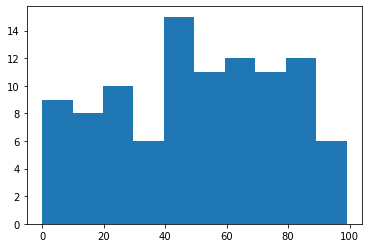

In [40]:
plt.hist(rints_3)

We can see here that this array is not evenly distributed. This is because a sample size of 100 is not sufficient enough to tell if there is a bias. Let's create another object and this time we will increase the size to 10000.

In [41]:
rints_4 = rng.integers(100, size = 10000)
rints_4

array([32, 16, 33, ..., 58, 43, 41], dtype=int64)

(array([ 973., 1047., 1029.,  976., 1040., 1037.,  954., 1003.,  955.,
         986.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

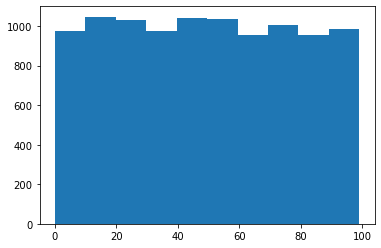

In [42]:
plt.hist(rints_4)

We can see here that the data is much more evenly distributed, the profile of the data is quite flat. The distribution into all of the bins seems roughly the same all the way across. Now let's change the size to 10 million and plot another histogram.

In [43]:
rints_5 = rng.integers(100, size = 10000000)
rints_5

array([35,  5, 85, ..., 65, 53, 39], dtype=int64)

(array([ 999256., 1000962., 1000930.,  997793., 1002007., 1000918.,
         999384.,  999681.,  999870.,  999199.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

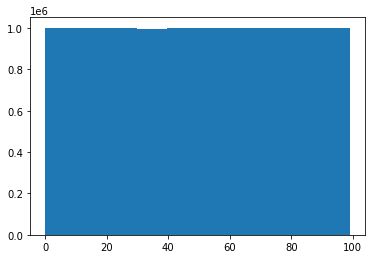

In [44]:
plt.hist(rints_5)

We can see here that we have an exact square. The bins each hold the number of values and we have a uniform distribution. This shows us that the integers function is not biased towards any particular integer. The function will generate all numbers with the same probability.

### Random

The random function is used to generate floating point numbers (floats). By default the interval is between 0 and 1 and it is a half-open interval. This means that the output will be greater than or equal to 0 and less than 1. Just like with integers, the numbers generated will be from a uniform distribution, however in this case they are continuous (i.e. not limited to integers). For the random fucntion, the "size" and "dtype" arguments act just the same as for the integers function and therefor we do not need to cover this again here. Let's start by creating an rng with a seed value of 42.

In [45]:
rng = np.random.default_rng(42)

In [46]:
rng.random()

0.7739560485559633

As seen above, if we do not pass any argument through the function, we will simply get a random number between 1 and 0, or in other words this could be described as a random probability. If we put just one number in the paranthesis, this corresponds to the size.

In [47]:
rng.random(5)

array([0.43887844, 0.85859792, 0.69736803, 0.09417735, 0.97562235])

To chenge the range of the function, we need to use the formula:
<br>``(b - a) * random() + a``<br>
Below we have a three-by-two array of random numbers from 5 to 10. This is because b minus a is 10 minus 5 is +5 for the left hand side, and + a is +5 on the right hand side.

In [48]:
5 * rng.random((3, 2)) + 5

array([[8.80569851, 8.93032153],
       [5.64056816, 7.25192969],
       [6.85399012, 9.63382494]])

In [49]:
# Here the range is from 5 to 6
# 1 * rng.random((3, 2)) - 5 which is the same thing as:
rng.random((3, 2)) + 5

array([[5.64386512, 5.82276161],
       [5.4434142 , 5.22723872],
       [5.55458479, 5.06381726]])

We can do the same for negative numbers. Below the range is from -5 to 0. The a here is -5 and b minus a here is 0 plus 5:<br>``(0-(-5)) = (0 + 5) = 5``<br>

In [50]:
5 * rng.random((3, 2)) - 5

array([[-0.86184414, -1.841678  ],
       [-1.2095613 , -3.22737016],
       [-0.14650988, -0.53439439]])

In [51]:
# Here the range is from -4 to 5
# 1 * rng.random((3, 2)) - 5 which is the same thing as:
rng.random((3, 2)) - 5

array([[-4.2216165 , -4.80536129],
       [-4.533279  , -4.95619623],
       [-4.84571051, -4.31695105]])

Let's now investigate whether or not the integers function has any bias towards any particular numbers. We'll do the same investigation as we did for NumPy integers. 3 histograms where the interval a half-open interval between 0 and 1 with size samples of 100, 10000 and 10 million.

In [52]:
rrandom_1 = rng.random(100)
rrandom_1

array([0.74476216, 0.96750973, 0.32582536, 0.37045971, 0.46955581,
       0.18947136, 0.12992151, 0.47570493, 0.22690935, 0.66981399,
       0.43715192, 0.8326782 , 0.7002651 , 0.31236664, 0.8322598 ,
       0.80476436, 0.38747838, 0.2883281 , 0.6824955 , 0.13975248,
       0.1999082 , 0.00736227, 0.78692438, 0.66485086, 0.70516538,
       0.78072903, 0.45891578, 0.5687412 , 0.139797  , 0.11453007,
       0.66840296, 0.47109621, 0.56523611, 0.76499886, 0.63471832,
       0.5535794 , 0.55920716, 0.3039501 , 0.03081783, 0.43671739,
       0.21458467, 0.40852864, 0.85340307, 0.23393949, 0.05830274,
       0.28138389, 0.29359376, 0.66191651, 0.55703215, 0.78389821,
       0.66431354, 0.40638686, 0.81402038, 0.16697292, 0.02271207,
       0.09004786, 0.72235935, 0.46187723, 0.16127178, 0.50104478,
       0.1523121 , 0.69632038, 0.44615628, 0.38102123, 0.30151209,
       0.63028259, 0.36181261, 0.08764992, 0.1180059 , 0.96189766,
       0.90858069, 0.69970713, 0.26586996, 0.96917638, 0.77875

(array([10., 11., 10., 10., 14.,  9., 10., 11., 10.,  5.]),
 array([0.00736227, 0.10354368, 0.19972509, 0.2959065 , 0.39208791,
        0.48826932, 0.58445073, 0.68063215, 0.77681356, 0.87299497,
        0.96917638]),
 <BarContainer object of 10 artists>)

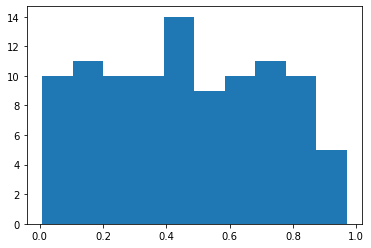

In [53]:
plt.hist(rrandom_1)

In [54]:
rrandom_2 = rng.random(10000)
rrandom_2

array([0.17059297, 0.92512012, 0.58106114, ..., 0.95014389, 0.12381909,
       0.38314887])

(array([ 985., 1056., 1006.,  998.,  968., 1031., 1007.,  983.,  971.,
         995.]),
 array([3.14419644e-04, 1.00280680e-01, 2.00246940e-01, 3.00213200e-01,
        4.00179460e-01, 5.00145720e-01, 6.00111980e-01, 7.00078240e-01,
        8.00044500e-01, 9.00010760e-01, 9.99977020e-01]),
 <BarContainer object of 10 artists>)

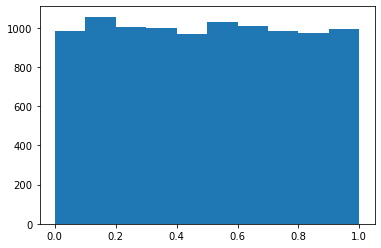

In [55]:
plt.hist(rrandom_2)

In [56]:
rrandom_3 = rng.random(10000000)
rrandom_3

array([0.87952756, 0.10656797, 0.48360425, ..., 0.1380578 , 0.39814049,
       0.64368557])

(array([ 999256., 1000937., 1001055., 1000130., 1001440.,  999423.,
         998472., 1000015.,  999297.,  999975.]),
 array([5.34029949e-08, 1.00000040e-01, 2.00000027e-01, 3.00000013e-01,
        4.00000000e-01, 4.99999986e-01, 5.99999973e-01, 6.99999960e-01,
        7.99999946e-01, 8.99999933e-01, 9.99999920e-01]),
 <BarContainer object of 10 artists>)

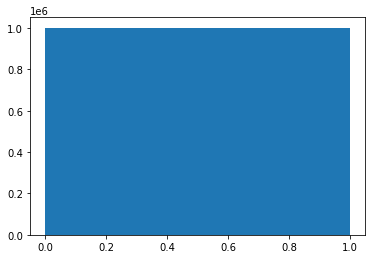

In [57]:
plt.hist(rrandom_3)

We can see here that again we have an exact square. The bins each hold the number of values and we have a uniform distribution. This shows us that the random function is not biased towards any particular number. The function will generate all numbers with the same probability.

### Choice

The choice function generates a random sample from a given array. This means that the choice function randomly picks one of the arguments that have it has been given from a selection. As before, let's create an rng with a seed value of 1 this time. We can pass an integer or aray_like object as an argument for the 'a' parameter. For array_like arguments this could be something like 'Rock', Paper or 'Scissors' which I will talk more about later. If the the argument is an integer, then the function calls np.arange(a) to generate the sample. This means that if we chose 5 for a, it would be the equivalent of typing ``[0, 1, 2, 3, 4]``, another half open interval.

In [58]:
rng = np.random.default_rng(1)

In [59]:
rng.choice(5, 3) # size = 3

array([2, 2, 3], dtype=int64)

In the above example, we have asked the choice function to pick 3 random numbers between 0 and 4. Below is the same function writen differently:

In [60]:
rng.choice([0, 1, 2, 3, 4], 3)

array([4, 0, 0])

In [61]:
rng.choice(5, (4, 5)) # another example with size = 4 x 5

array([[4, 4, 1, 1, 4],
       [2, 1, 4, 1, 2],
       [3, 2, 0, 0, 4],
       [3, 4, 2, 4, 1]], dtype=int64)

The 'p' parameter is the probability associated with each entry in 'a'. How much bias is given to each of the entries in 'a'. This is an optional value and if no value is given then the choice function assumes a uniform distribution over all entries in a, meaning that all of the entries have an equal chance of being selected. Note that the probabilities must add up to 1.

In [62]:
rng.choice(5, 3, p = [0.1, 0, 0.3, 0.6, 0])
# 10% chance of 0 being selected,
# 0 % chance of 1 being selected,
# 30% chance of 2 being selected,
# 60 % chance of 3 being selected,
# 0 % chance of 4 being selected.

array([3, 2, 3], dtype=int64)

The replace parameter is an optional parameter and it is boolean. The default is set to true and it means that the entries can be selected multiple times.

In [63]:
rng.choice(5, 3, replace=False)
# The numbers ranging from 0 to 4 cannot be selected more than once.

array([2, 1, 0], dtype=int64)

In [64]:
rng.choice(['Rock', 'Paper', 'Scissors'] , 3, replace=False)
# Each string cannot be selected more than once.
# The size must not be later than the amount of things that can be selected.

array(['Paper', 'Scissors', 'Rock'], dtype='<U8')

In [65]:
rng.choice([[0, 1, 2], [3, 4, 5], [6, 7, 8]], 2, replace=False)
# Another example from a 2-D array

array([[0, 1, 2],
       [3, 4, 5]])

In [66]:
rng.choice(5, 3, replace=False, p=[0.1, 0, 0.3, 0.6, 0])
# Another example from np.arange(5) of size 3 without replacement and non-uniform

array([3, 2, 0], dtype=int64)

Let's now investigate whether or not the integers function has any bias towards any particular numbers. We'll use the pandas 'Series' function and from the 'Series' module we'll use the 'plot.bar' function to show a bar chart of the 'Choice' function. First we'll convert the output of the below choice function into a Series and store it in the variable 's'. Next, we'll use the Series function ``value_counts`` to show the amount of times each entry in the choice function was selected. We'll also going to put the order displayed in the order of 'Rock', 'Paper', 'Scissors' because this is the way everyone knows the game. The default for ``value_counts`` is ascending. To do this, we just need to pass the expression as a list through vc and then assign it back to the original variable as seen below. We then print ``vc`` to show the value counts and then we use the Series function ``plot.bar`` to show the bar chart.

Rock        4
Paper       7
Scissors    4
dtype: int64


<AxesSubplot:>

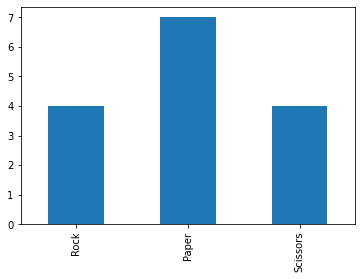

In [67]:
s = Series(rng.choice(['Rock', 'Paper', 'Scissors'], 
                      size = 15)) # low sample size
vc = s.value_counts() 
vc = vc[['Rock', 'Paper', 'Scissors']] # change the order to display
print(vc)
vc.plot.bar()

We can see here that this array is not evenly distributed. This is because a sample size of 15 is not sufficient enough to tell if there is a bias. Let's create another object and this time we will increase the size to 10 million

Rock        3332024
Paper       3334562
Scissors    3333414
dtype: int64


<AxesSubplot:>

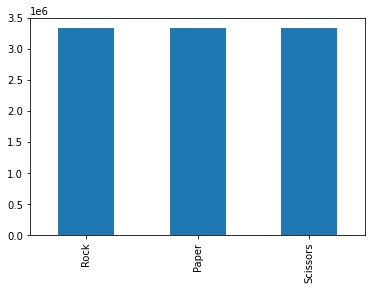

In [68]:
s = Series(rng.choice(['Rock', 'Paper', 'Scissors'], size = 10000000))
vc = s.value_counts()
vc = vc[['Rock', 'Paper', 'Scissors']]
print(vc)
vc.plot.bar()

We can see here that the bars are evenly distributed and the value counts are almost a third each, therefore there is no bias in selection. This of course could be manipulated as below. We can choose the bias in favour of whichever entry we want. Here, 'Rock' is 10%, 'Paper' is 20% and  'Scissors' is 70%. We can see that the bar chart and value counts reflect this.

Rock        1000941
Paper       2000185
Scissors    6998874
dtype: int64


<AxesSubplot:>

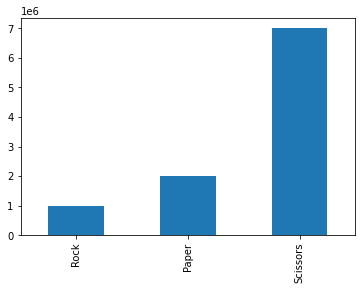

In [69]:
s = Series(rng.choice(['Rock', 'Paper', 'Scissors'], size = 10000000,
                      p = [0.10, 0.20, 0.70]))
vc = s.value_counts()
vc = vc[['Rock', 'Paper', 'Scissors']]
print(vc)
vc.plot.bar()

### Bytes

The 'bytes' function generates a pseudo-random sample of bytes. A byte is a unit of digital information that most commonly consists of eight bits. The 'byte' function has only one parameter which is 'length'. The syntax for the bytes function is:<br>
``numpy.random.Generator.bytes(length)``<br>
The 'length' parameter determines the number of bytes that will be outputted. See below examples of the 'bytes' function:

In [70]:
rng = np.random.default_rng(0)

In [71]:
rng.bytes(10) # Generating 10 bytes

b'_\x82\xc2\xd9\xcf\xeb\x0f\xa3!\xd7'

In [72]:
rng.bytes(20) # Generating 20 bytes

b"\xf8\xbd\x10E\xb8\xe8\xcdN\xa9=}\n\x1d\xf0B\x13\xb6';\x04"

## Permutation Functions

### Shuffle

The 'shuffle' function modifies an array or sequence in-place by shuffling its contents. This means that the function re-orders the contents within a sequence. It only changes the order of an existing array, it does not add or remove any of the contents. It is like shiffling a deck of cards. No cards or removed or added. The difference between the 'shuffle' function and the 'permuted' function is that the 'shuffle' function is done in-place, meaning that the operation permanently alters the variable or object but the 'permutation' function returns a copy and keeps the original variable intact. Let's use numpy.arange to generate an array from 0 to 9 and then shuffle it's contents.

In [73]:
rng = np.random.default_rng(10)

In [74]:
arr = np.arange(10) # list of numbers from 0 to 9
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [75]:
rng.shuffle(arr)
arr # variable arr is shuffled in-place, operation is permanent

array([1, 3, 2, 4, 7, 9, 5, 6, 0, 8])

The second parameter in the 'shuffle' function is the 'axis' parameter. The default here is ``axis = 0``. This parameter only applies to dimensions which are higher than 1, i.e. 2-D arrays and higher. Let's use numpy.arrange again and then use numpy.reshape to gives a new shape to the array without changing its data, which will generate a 3 x 3 array. We will keep the default parameter of ``axis = 0`` for the first example and then ``axis = 1`` to see which part of the array gets shuffled.

In [76]:
arr = np.arange(9).reshape((3, 3)) # reshape the array to 3 x 3 array
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [77]:
rng.shuffle(arr)
arr

array([[3, 4, 5],
       [0, 1, 2],
       [6, 7, 8]])

In [78]:
arr = np.arange(9).reshape((3, 3)) 
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [79]:
rng.shuffle(arr, axis=1)
arr

array([[1, 0, 2],
       [4, 3, 5],
       [7, 6, 8]])

We can see here that 'axis=0' does not change the order within each individual array, but it changes the high level order of the sub-arrays. The numbers are still in the same order in their respctive arrays (e.g. [0, 1, 2]) but the order of the three arrays themselves has changed.<br>
'axis=1' keeps the high level order of sub-arrays the same, but it changes the order in each of the sub-arrays. In this case [0,1,2] can change to [1, 0, 2] or similar, but the array that contains those three numbers remains first in the high level order.

### Permutation

The 'permutation' function is similar to the 'shuffle' function with one key difference. As mentioned above in the 'shuffle' section, the'shuffle' function is done in-place, but the 'permutation' function returns a copy and keeps the original variable intact. Let's create a variable called 'x' which is just a list of numbers from 0 to 9 using numpy.arange. If we perform the 'permutation' operation on 'x', the contents will be shuffled. If we then check the contents of x after this operation, we can see that the variable is still a list of numbers from 0 to 9 and is still intact.

In [80]:
rng = np.random.default_rng(10)
x = np.arange(10)
rng.permutation(x) # Shuffles contets of 'x' but creates a copy

array([1, 3, 2, 4, 7, 9, 5, 6, 0, 8])

In [81]:
x # 'x' is still the same value as before

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

If we pass an integer through the 'permutation' function it will call ``np.arange()``. For example, if we do: ``rng.permutation(10)``, this is the same thing as the above example. If x is an array, a copy is made and the elements are shuffled randomly like in the example below.

In [82]:
rng.permutation([1, 4, 9, 12, 15])

array([ 4, 15,  1,  9, 12])

The 'axis' parameter for 'permutarion' works the exact same way that 'shuffle' works. See below the same examples as we used for 'shuffle'.

In [83]:
arr = np.arange(9).reshape((3, 3))
rng.permutation(arr)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [84]:
arr = np.arange(9).reshape((3, 3))
rng.shuffle(arr, axis=1)
arr

array([[1, 2, 0],
       [4, 5, 3],
       [7, 8, 6]])

### Permuted

The 'permuted' function is similar to the 'shuffle' function with the key difference being that each slice in the permutated method is shuffled independently of the others. The sytax is:<br>
``random.Generator.permuted(x, axis=None, out=None)``<br>
The function randomly permutes ``x`` along axis ``axis``.

In [85]:
rng = np.random.default_rng(10)

In [86]:
# Create a test array:
x = np.arange(24).reshape(3, 8)
x 

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [87]:
y = rng.permuted(x, axis = 0)
y # Columns shuffled with the original unchanged

array([[16,  9, 18, 11, 12, 13, 14, 15],
       [ 8, 17,  2, 19,  4,  5,  6, 23],
       [ 0,  1, 10,  3, 20, 21, 22,  7]])

In [88]:
y = rng.permuted(x, axis = 1)
y # Rows shuffled with the original unchanged

array([[ 3,  5,  4,  2,  0,  7,  6,  1],
       [12, 13, 14, 11,  9, 10,  8, 15],
       [18, 19, 21, 20, 23, 16, 17, 22]])

In [89]:
x # The original is unchanged

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [90]:
# To shuffle the rows of x in-place, pass x as the out parameter:
y = rng.permuted(x, axis = 1, out = x)
x # Rows shuffled

array([[ 5,  4,  0,  1,  2,  3,  7,  6],
       [12, 13,  9,  8, 15, 10, 14, 11],
       [20, 21, 23, 19, 16, 22, 17, 18]])

In [91]:
# Note that when the out parameter is given, the return value is out:
# out must be a NumPy array
y is x

True

## Binomial Distribution
Binomial distribution is discrete version of normal distribution

Binomial distribution is discrete version of normal distribution

In [92]:
# Setting the PRNG as PCG-64
rng = np.random.default_rng(42)

Below is a picture of the hidden block spinner in Mario Party. If the arrow lands in the smaller segment, then the player recieves a star. If it lands in the larger segment, the player does not recive a star.

![Hidden Block](https://mario.wiki.gallery/images/9/98/SMP_Powderkeg_Hidden_Block.jpg)

Here is the code that represents the Binomial distribution of the probability of the player recieving a star

In [93]:
hidden_block = rng.binomial(n=1, p=0.15, size=100000)

In [94]:
hidden_block

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [95]:
#Function takes the array to be plotted, as well as strings from the x and y axis labels, and the title.
#Kernel Density Estimate (KDE) and discrete arguments will default to False, although can be set to true if needed.
def hist_plotting(array, xlabel, ylabel, title, kde=False, discrete = False):
    
    #Plotting the array as a histogram.
    ax = sns.histplot(array, kde = kde, discrete = discrete)
    
    #Setting the x and y axis labels.
    ax.set(xlabel = xlabel, ylabel = ylabel)
    
    #Setting the title.
    ax.set_title(title)
    
    #Return the "ax" object.
    return ax

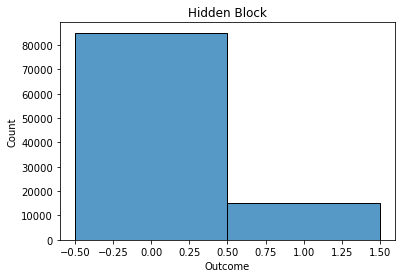

In [96]:
#Setting the hist_plotting function to the variable "ax" so that I can tidy up the x axis.
ax = hist_plotting(hidden_block, 'Outcome', 'Count', "Hidden Block", discrete=True)

## References
[01][Towards Data Science - Why NumPy Is So Fundamental](https://towardsdatascience.com/why-numpy-is-so-fundamental-78ae2807300) <br>
[02][Numpy.org - Random sampling (numpy.random)](https://numpy.org/doc/stable/reference/random/index.html)<br>
[03][numpy.random.binomial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html?highlight=binomial#numpy.random.binomial)<br>
[04][Random sampling (numpy.random)](https://numpy.org/doc/stable/reference/random/index.html)<br>
[05][Sharp Sight - NumPy Random Seed, Explained](https://www.sharpsightlabs.com/blog/numpy-random-seed/#numpy-random-seed-examples)<br>
[06][Sharp Sight - How to use numpy random normal in Python](https://www.sharpsightlabs.com/blog/numpy-random-normal/)<br>
[07][Wolfram MathWorld - Pseudorandom Number](https://mathworld.wolfram.com/PseudorandomNumber.html)<br>
[08][Wikipedia - Radom Walk](https://en.wikipedia.org/wiki/Random_walk)<br>
[09][TestU01: A C Library for Empirical Testing of Random Number Generators](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=https%3A%2F%2Fwww.iro.umontreal.ca%2F~lecuyer%2Fmyftp%2Fpapers%2Ftestu01.pdf&clen=801628&chunk=true)<br>
[10][PCG: AFamily of Simple Fast Space-Efficient Statistically GoodAlgorithms for Random NumberGeneration](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=https%3A%2F%2Fwww.cs.hmc.edu%2Ftr%2Fhmc-cs-2014-0905.pdf&clen=2326958&chunk=true)<br>
[11][Numpy.org - Permuted Congruential Generator (64-bit, PCG64)](https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html)<br>
[12][Wikipedia - Mersenne Twister](https://en.wikipedia.org/w/index.php?title=Mersenne_Twister&oldid=1049043226)<br>
[13][Wikipedia - Permuted congruential generator](https://en.wikipedia.org/w/index.php?title=Permuted_congruential_generator&oldid=999160939)<br>
[14][numpy.random.Generator.integers](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers)<br>
[15][numpy.random.Generator.random](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random)<br>
[16][numpy.random.Generator.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice)<br>
[17][numpy.random.Generator.bytes](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes)<br>
[18][Wikipedia - Interval (mathematics)](https://en.wikipedia.org/wiki/Interval_(mathematics)#Terminology)<br>
[19][numpy.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)<br>
[20][pandas.Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)<br>
[21][pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)<br>
[22][pandas.Series.plot.bar](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html)<br>
[23][Wikipedia - Byte](https://en.wikipedia.org/wiki/Byte)
[24][NumPy - Shuffle](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle)<br>
[25][NumPy - Permutation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation)<br>
[26][NumPy - Permuted](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permuted.html#numpy.random.Generator.permuted)<br>
[27][numpy.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)<br>
[28][numpy.reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)<br>
[29][W3schools - is operator](https://www.w3schools.com/python/python_operators.asp)<br>
[][]()<br>

***
## End